In [2]:
import numpy as np
import cvxpy as cvx
from synthetic_dataset import SyntheticClassificationDataset2d
from SSC import SparseSubspaceClustering

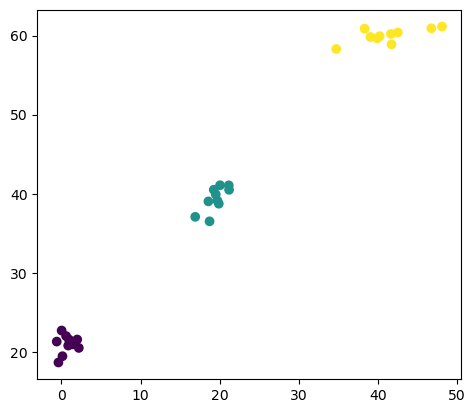

In [75]:
data_generation_params = {
    'line_NONoval': {
        'n_samples': np.array([10, 10, 10]),
        'cluster_center': np.array([[1,21], [20,40], [40,60]]),
        'cluster_std': np.array([[1.0, 1.0], [2.0, 0.5], [1.0, 4.0]]),
        'rotation': np.array([45, 60, 90]),
        'random_state': 42
    },
    'line_oval': {
        'n_samples': np.array([50, 50, 50]),
        'cluster_center': np.array([[1,1], [10,10], [20,20]]),
        'cluster_std': np.array([[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]),
        'rotation': np.array([0, 0, 0]),
        'random_state': 42
    },
    'NONline_NONoval': {
        'n_samples': np.array([50, 50, 50]),
        'cluster_center': np.array([[1,1], [2,10], [20,5]]),
        'cluster_std': np.array([[1.0, 1.0], [2.0, 0.5], [1.0, 4.0]]),
        'rotation': np.array([45, 0, 90]),
        'random_state': 42
    },
    'NONline_oval': {
        'n_samples': np.array([50, 50, 50]),
        'cluster_center': np.array([[1,1], [2,10], [20,5]]),
        'cluster_std': np.array([[1.0, 1.0], [1.0, 1.0], [1.0, 1.0]]),
        'rotation': np.array([0, 0, 0]),
        'random_state': 42
    },
    'line': {
        'n_samples': np.array([50, 50, 50]),
        'cluster_center': np.array([[-20,5], [0,5], [20,3]]),
        'cluster_std': np.array([[2.0, 0.5], [2.0, 0.5], [2.0, 0.5]]),
        'rotation': np.array([0, 0, 0]),
        'random_state': 42
    },  
    'line2': {
        'n_samples': np.array([50, 50]),
        'cluster_center': np.array([[-5,5], [0,5]]),
        'cluster_std': np.array([[2.0, 0.5], [2.0, 0.5]]),
        'rotation': np.array([135, 135]),
        'random_state': 42
    },  
}

data_gen = data_generation_params['line_NONoval']
data = SyntheticClassificationDataset2d(data_gen['n_samples'], data_gen['cluster_center'], data_gen['cluster_std'], data_gen['rotation'])
data.plot()

In [76]:
ssc = SparseSubspaceClustering(optim_prog='L1Perfect', k=np.amax(data.y)+1)
ssc.fit(data.X)

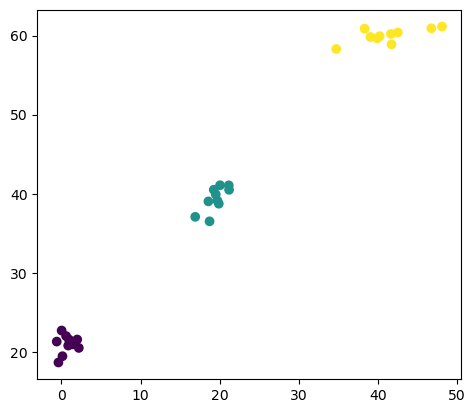

In [77]:
data.clustering_labels = ssc.labels
data.plot(ground_truth=True)

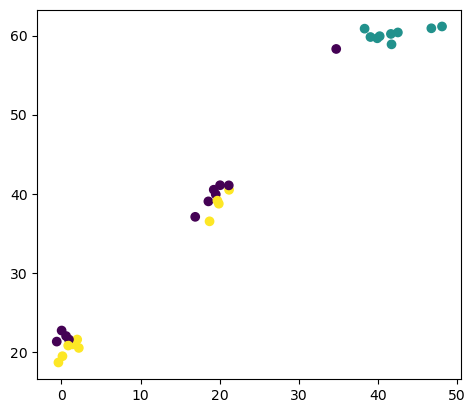

In [78]:
data.plot(ground_truth=False)

In [42]:
ssc.coef_matrix

array([[ 0.00000000e+00,  4.37495830e-03,  1.41491389e-02, ...,
         6.10189361e-04,  4.72896167e-03,  1.92441573e-03],
       [ 4.84833888e-13,  0.00000000e+00,  2.16741342e-03, ...,
         1.48184593e-03,  1.06838096e-02,  4.42300339e-03],
       [ 2.31033679e-12,  1.25131613e-02,  0.00000000e+00, ...,
         1.12908770e-03,  1.64996258e-02,  7.63921559e-03],
       ...,
       [-2.51770070e-12,  6.96743362e-03,  8.36171523e-04, ...,
         0.00000000e+00,  6.66606773e-03,  2.83756920e-03],
       [ 2.90057153e-13,  1.00478733e-02,  1.86968182e-03, ...,
         1.63535166e-03,  0.00000000e+00,  4.21971051e-03],
       [ 3.85145304e-13,  1.65318113e-02,  1.68993737e-03, ...,
         1.81885925e-03,  1.08122626e-02,  0.00000000e+00]])

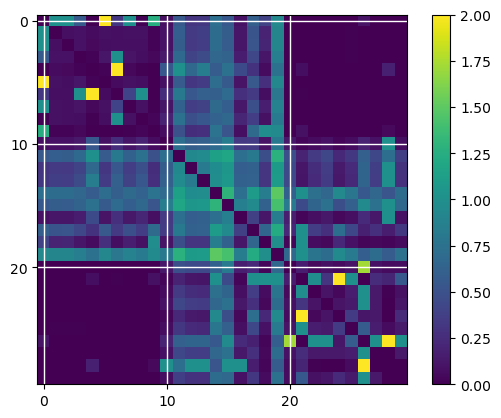

In [93]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(ssc.adj_matrix)
ax = plt.gca();
ax.set_xticks(np.arange(0, 30, 10))
ax.set_yticks(np.arange(0, 30, 10))
ax.grid(color='w', linestyle='-', linewidth=1)
plt.colorbar()
plt.show()

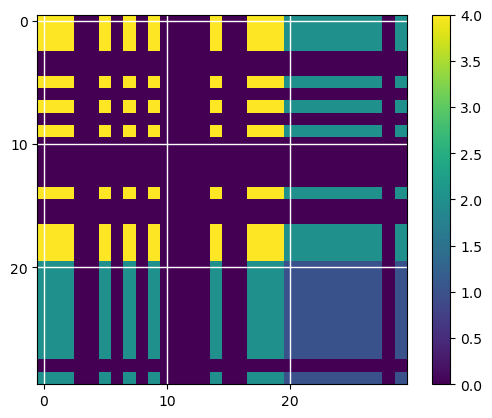

In [92]:
import numpy as np
import matplotlib.pyplot as plt

matrix = np.outer(ssc.labels.T, ssc.labels)
plt.imshow(matrix)
ax = plt.gca();
ax.set_xticks(np.arange(0, 30, 10))
ax.set_yticks(np.arange(0, 30, 10))
ax.grid(color='w', linestyle='-', linewidth=1)
plt.colorbar()
plt.show()

In [91]:
np.outer(ssc.labels.T, ssc.labels)

array([[4, 4, 4, 0, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 4, 4, 2, 2,
        2, 2, 2, 2, 2, 2, 0, 2],
       [4, 4, 4, 0, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 4, 4, 2, 2,
        2, 2, 2, 2, 2, 2, 0, 2],
       [4, 4, 4, 0, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 4, 4, 2, 2,
        2, 2, 2, 2, 2, 2, 0, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [4, 4, 4, 0, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 4, 4, 2, 2,
        2, 2, 2, 2, 2, 2, 0, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [4, 4, 4, 0, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 4, 4, 2, 2,
        2, 2, 2, 2, 2, 2, 0, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [4, 4, 4, 0, 0, 4, 0, 4, 0, 4,

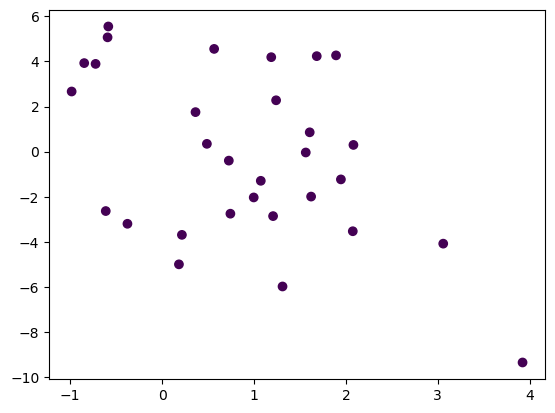

In [8]:
n_samples = 30
cluster_center = np.array([[1,1]])
cluster_std = np.array([[1.0, 4.0]])
rotation = 0
random_state = 42

data = SyntheticClassificationDataset2d(n_samples, cluster_center, cluster_std, rotation)
data.plot()